In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [64]:
df = pd.read_csv('FlightPrice.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,GO FIRST,G8- 328,13:20,Delhi,02h 00m,0,15:20,Mumbai,5950
1,1,GO FIRST,G8- 334,07:00,Delhi,02h 10m,0,09:10,Mumbai,5950
2,2,GO FIRST,G8- 336,14:30,Delhi,02h 10m,0,16:40,Mumbai,5950
3,3,SpiceJet,SG-8701,07:20,Delhi,02h 15m,0,09:35,Mumbai,5950
4,4,GO FIRST,G8- 323,18:20,Delhi,02h 15m,0,20:35,Mumbai,5950
...,...,...,...,...,...,...,...,...,...,...
1508,4526,Air India,AI-615,06:00,Mumbai,10h 15m,2,16:15,Bangalore,18543
1509,4527,Air India,AI-615,06:00,Mumbai,14h 15m,2,20:15,Bangalore,19593
1510,4528,Air India,AI-615,06:00,Mumbai,12h 20m,2,18:20,Bangalore,20118
1511,4529,Air India,AI-617,11:05,Mumbai,13h 00m,2,00:05,Bangalore,20223


Data has 1513 data and 10 columns

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1513 non-null   int64 
 1   0           1513 non-null   object
 2   1           1513 non-null   object
 3   2           1513 non-null   object
 4   3           1513 non-null   object
 5   4           1513 non-null   object
 6   5           1513 non-null   int64 
 7   6           1513 non-null   object
 8   7           1513 non-null   object
 9   8           1513 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 118.3+ KB


In [66]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['0', '1', '2', '3', '4', '6', '7']


In [67]:
for i in df.columns:
    a = df[i].isna().sum()
    if a > 0:
        print(i,'column has',a,'NaN values')

Data has no Null values

In [68]:
for i in df.columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')

Unnamed: 0 column has 1513 categorical data counts

0 column has 8 categorical data counts

1 column has 565 categorical data counts

2 column has 215 categorical data counts

3 column has 3 categorical data counts

4 column has 310 categorical data counts

5 column has 3 categorical data counts

6 column has 246 categorical data counts

7 column has 7 categorical data counts

8 column has 742 categorical data counts



0, 3, 5 and 7 column are categorical columns

In [69]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,GO FIRST,G8- 328,13:20,Delhi,02h 00m,0,15:20,Mumbai,5950
1,1,GO FIRST,G8- 334,07:00,Delhi,02h 10m,0,09:10,Mumbai,5950
2,2,GO FIRST,G8- 336,14:30,Delhi,02h 10m,0,16:40,Mumbai,5950
3,3,SpiceJet,SG-8701,07:20,Delhi,02h 15m,0,09:35,Mumbai,5950
4,4,GO FIRST,G8- 323,18:20,Delhi,02h 15m,0,20:35,Mumbai,5950
...,...,...,...,...,...,...,...,...,...,...
1508,4526,Air India,AI-615,06:00,Mumbai,10h 15m,2,16:15,Bangalore,18543
1509,4527,Air India,AI-615,06:00,Mumbai,14h 15m,2,20:15,Bangalore,19593
1510,4528,Air India,AI-615,06:00,Mumbai,12h 20m,2,18:20,Bangalore,20118
1511,4529,Air India,AI-617,11:05,Mumbai,13h 00m,2,00:05,Bangalore,20223


In [71]:
df[['test0','test1']] = df['2'].str.split(':',expand=True)
df[['test2','test3']] = df['6'].str.split(':',expand=True)

In [72]:
df['Departure_time'] = df['test0'] + '.' + df['test1']
df['Arrival_time'] = df['test2'] + '.' + df['test3']

In [73]:
df = df.drop(['2','6','test0','test1','test2','test3'],axis=1)

In [74]:
df.columns = ['Unnamed: 0','Airline','Flight_name','Source', 'Duration', 'Stops','Destination','Price','Departure_time', 'Arrival_time']

In [75]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Flight_name', 'Source', 'Duration', 'Stops',
       'Destination', 'Price', 'Departure_time', 'Arrival_time'],
      dtype='object')

In [76]:
df = df.drop(['Unnamed: 0'],axis=1)

'Unnamed: 0' has no imp values hence have dropped the column

In [77]:
df[['test0','test1']] = df['Duration'].str.split('h',expand=True)
df[['test2','test3']] = df['test1'].str.split('m',expand=True)
df['Duration'] = df['test0'] + '.' + df['test2']
df[['test2','test3']] = df['Duration'].str.split(' ',expand=True)
df['Duration'] = df['test2'] + df['test3']

In [79]:
df = df.drop(['test0','test1','test2','test3'],axis=1)
df

,Airline,Flight_name,Source,Duration,Stops,Destination,Price,Departure_time,Arrival_time
0,GO FIRST,G8- 328,Delhi,02.00,0,Mumbai,5950,13.20,15.20
1,GO FIRST,G8- 334,Delhi,02.10,0,Mumbai,5950,07.00,09.10
2,GO FIRST,G8- 336,Delhi,02.10,0,Mumbai,5950,14.30,16.40
3,SpiceJet,SG-8701,Delhi,02.15,0,Mumbai,5950,07.20,09.35
4,GO FIRST,G8- 323,Delhi,02.15,0,Mumbai,5950,18.20,20.35
...,...,...,...,...,...,...,...,...,...
1508,Air India,AI-615,Mumbai,10.15,2,Bangalore,18543,06.00,16.15
1509,Air India,AI-615,Mumbai,14.15,2,Bangalore,19593,06.00,20.15
1510,Air India,AI-615,Mumbai,12.20,2,Bangalore,20118,06.00,18.20
1511,Air India,AI-617,Mumbai,13.00,2,Bangalore,20223,11.05,00.05


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         1513 non-null   object
 1   Flight_name     1513 non-null   object
 2   Source          1513 non-null   object
 3   Duration        1513 non-null   object
 4   Stops           1513 non-null   int64 
 5   Destination     1513 non-null   object
 6   Price           1513 non-null   int64 
 7   Departure_time  1513 non-null   object
 8   Arrival_time    1513 non-null   object
dtypes: int64(2), object(7)
memory usage: 106.5+ KB


In [81]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['Airline', 'Flight_name', 'Source', 'Duration', 'Destination', 'Departure_time', 'Arrival_time']


In [82]:
df = df.astype({'Duration': float})
df = df.astype({'Departure_time': float})
df = df.astype({'Arrival_time': float})

Changing data type from string to float as it contains number data

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         1513 non-null   object 
 1   Flight_name     1513 non-null   object 
 2   Source          1513 non-null   object 
 3   Duration        1513 non-null   float64
 4   Stops           1513 non-null   int64  
 5   Destination     1513 non-null   object 
 6   Price           1513 non-null   int64  
 7   Departure_time  1513 non-null   float64
 8   Arrival_time    1513 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 106.5+ KB


In [84]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [85]:
df.describe()

,Airline,Flight_name,Source,Duration,Stops,Destination,Price,Departure_time,Arrival_time
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,4.118969,326.550562,0.706543,10.151058,0.895572,2.089888,12722.491738,13.250859,14.079775
std,2.769422,161.746361,0.906949,7.316011,0.524215,1.839415,4901.620050,5.595961,6.572450
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4204.000000,0.100000,0.050000
25%,1.000000,214.000000,0.000000,5.100000,1.000000,1.000000,9039.000000,8.250000,9.100000
50%,5.000000,325.000000,0.000000,8.150000,1.000000,2.000000,12150.000000,13.200000,14.450000
75%,7.000000,483.000000,2.000000,14.300000,1.000000,4.000000,16044.000000,18.200000,19.550000
max,7.000000,564.000000,2.000000,48.500000,2.000000,6.000000,41859.000000,23.550000,23.550000


In [86]:
x = df.drop(['Price'],axis=1)
y = df['Price']

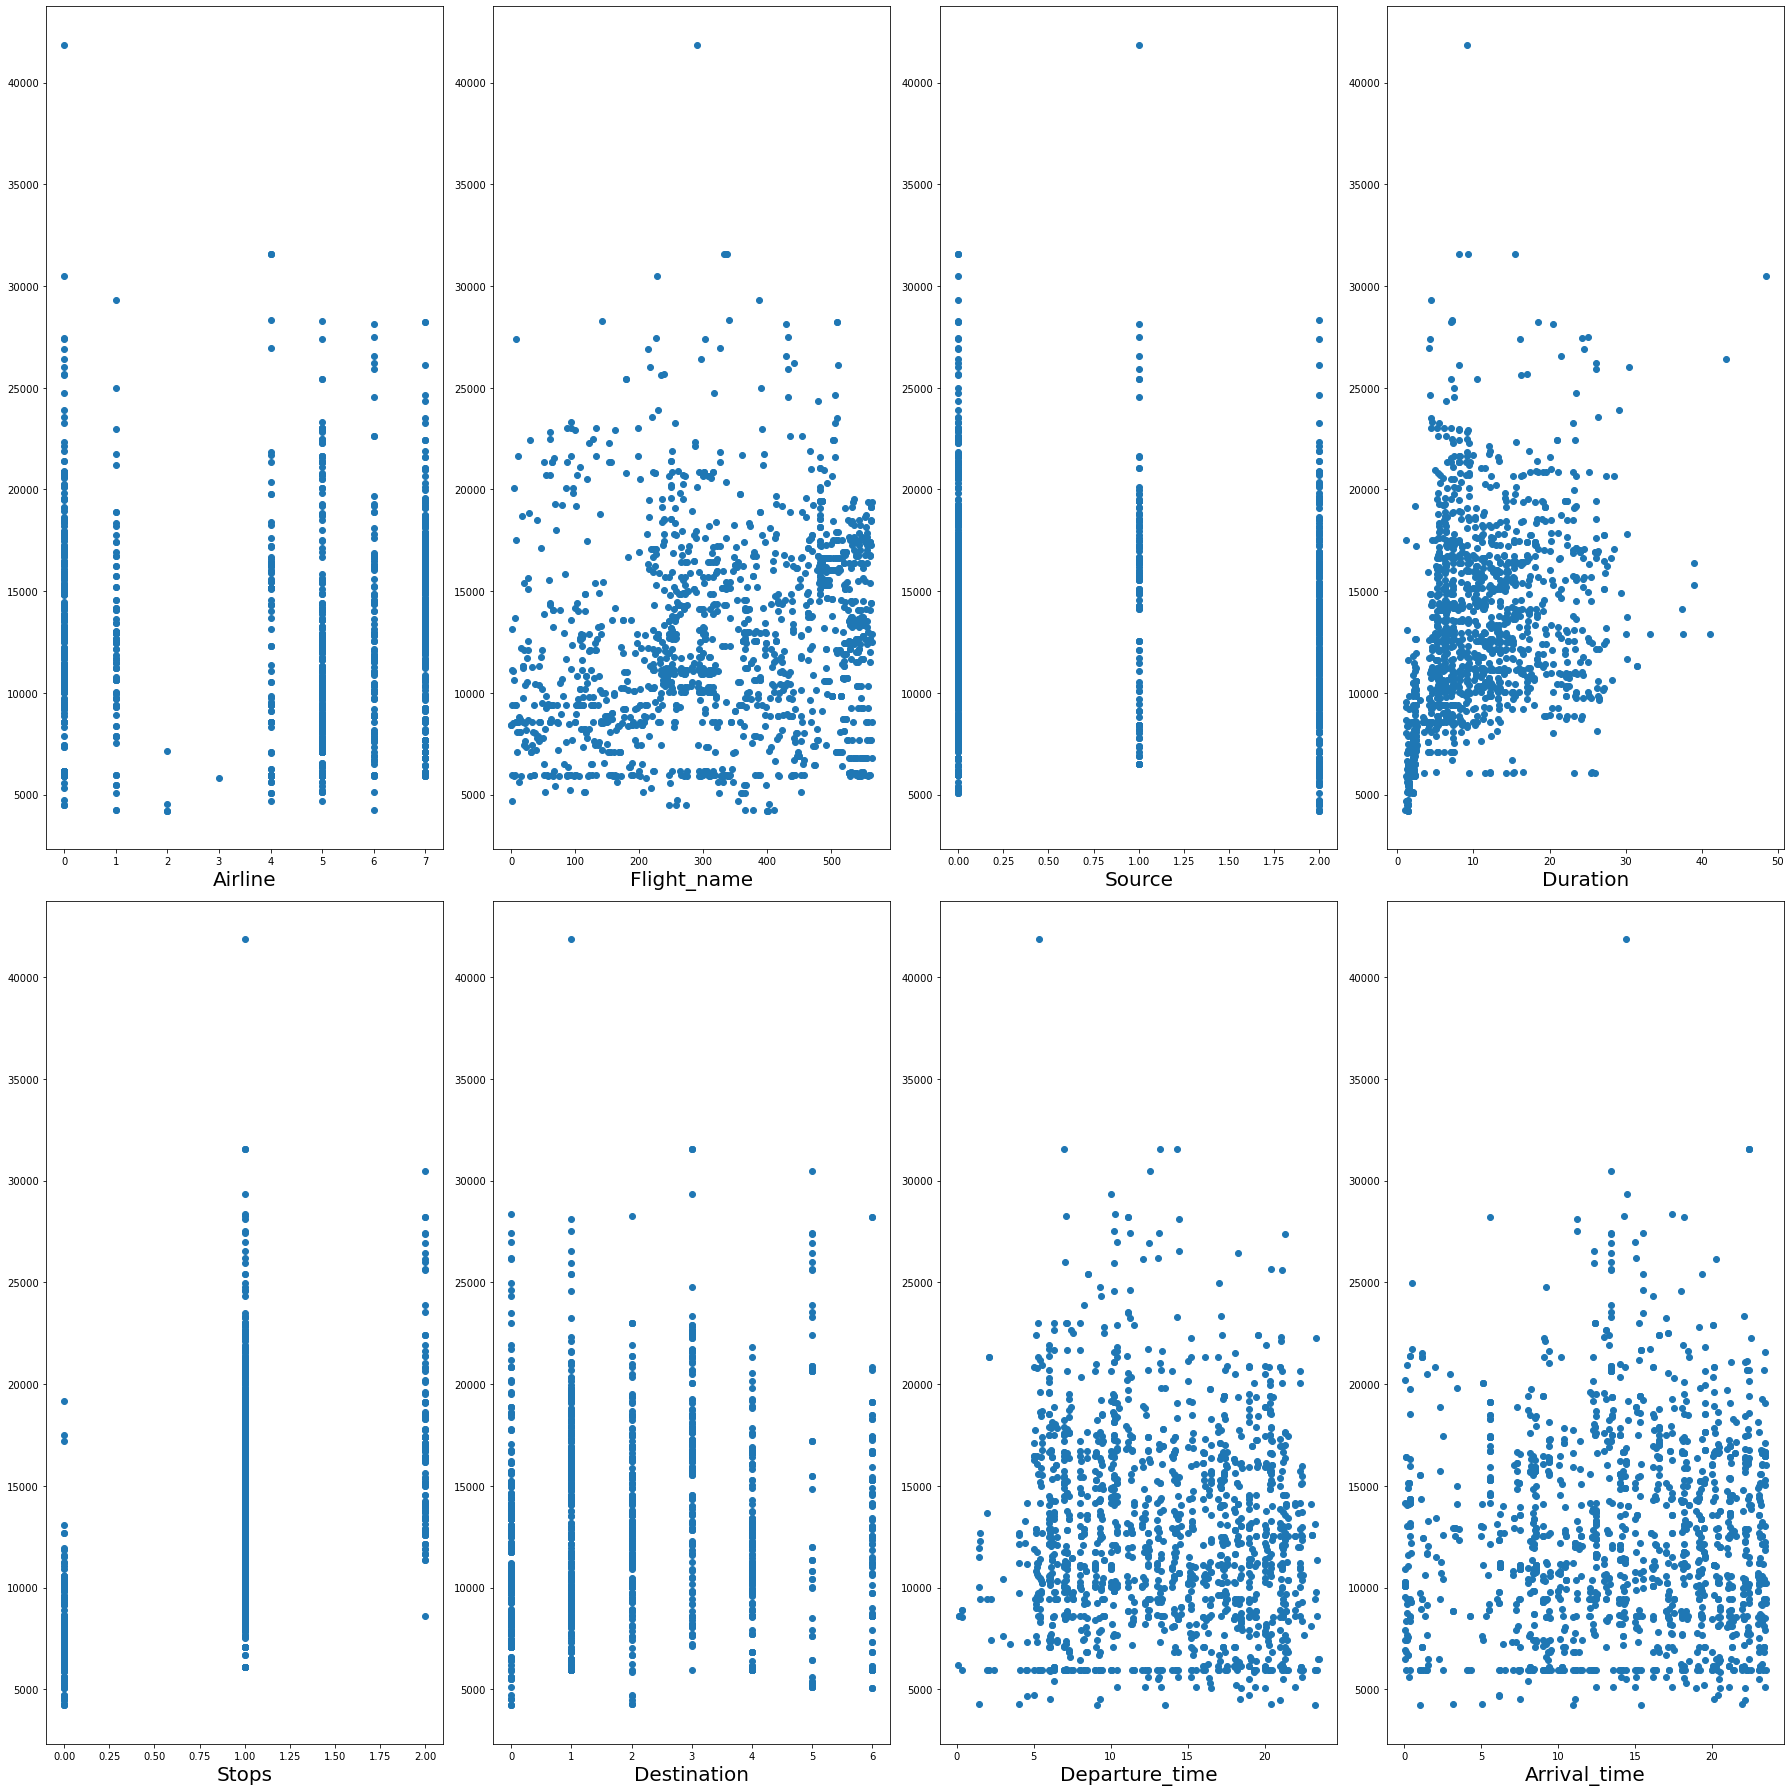

In [87]:
plt.figure(figsize=(25,25), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

- Duration and Stops column has high co-relation with Label.
- Airline, Arrival_time and Departure_time columns has Low/No co-relation with Label.

In [88]:
for i in df.columns:
    a = df[i].corr(df['Price'])
    print(i,'=',a)

Airline = 0.0026104166933065176
Flight_name = 0.17113583106068028
Source = -0.11572137517337641
Duration = 0.4076686836187264
Stops = 0.5678717795173519
Destination = 0.06435075613291334
Price = 1.0
Departure_time = -0.046567647665629486
Arrival_time = 0.02094046453885786


- Duration and Stops column has high co-relation with Label.
- Airline, Arrival_time and Departure_time columns has Low/No co-relation with Label.

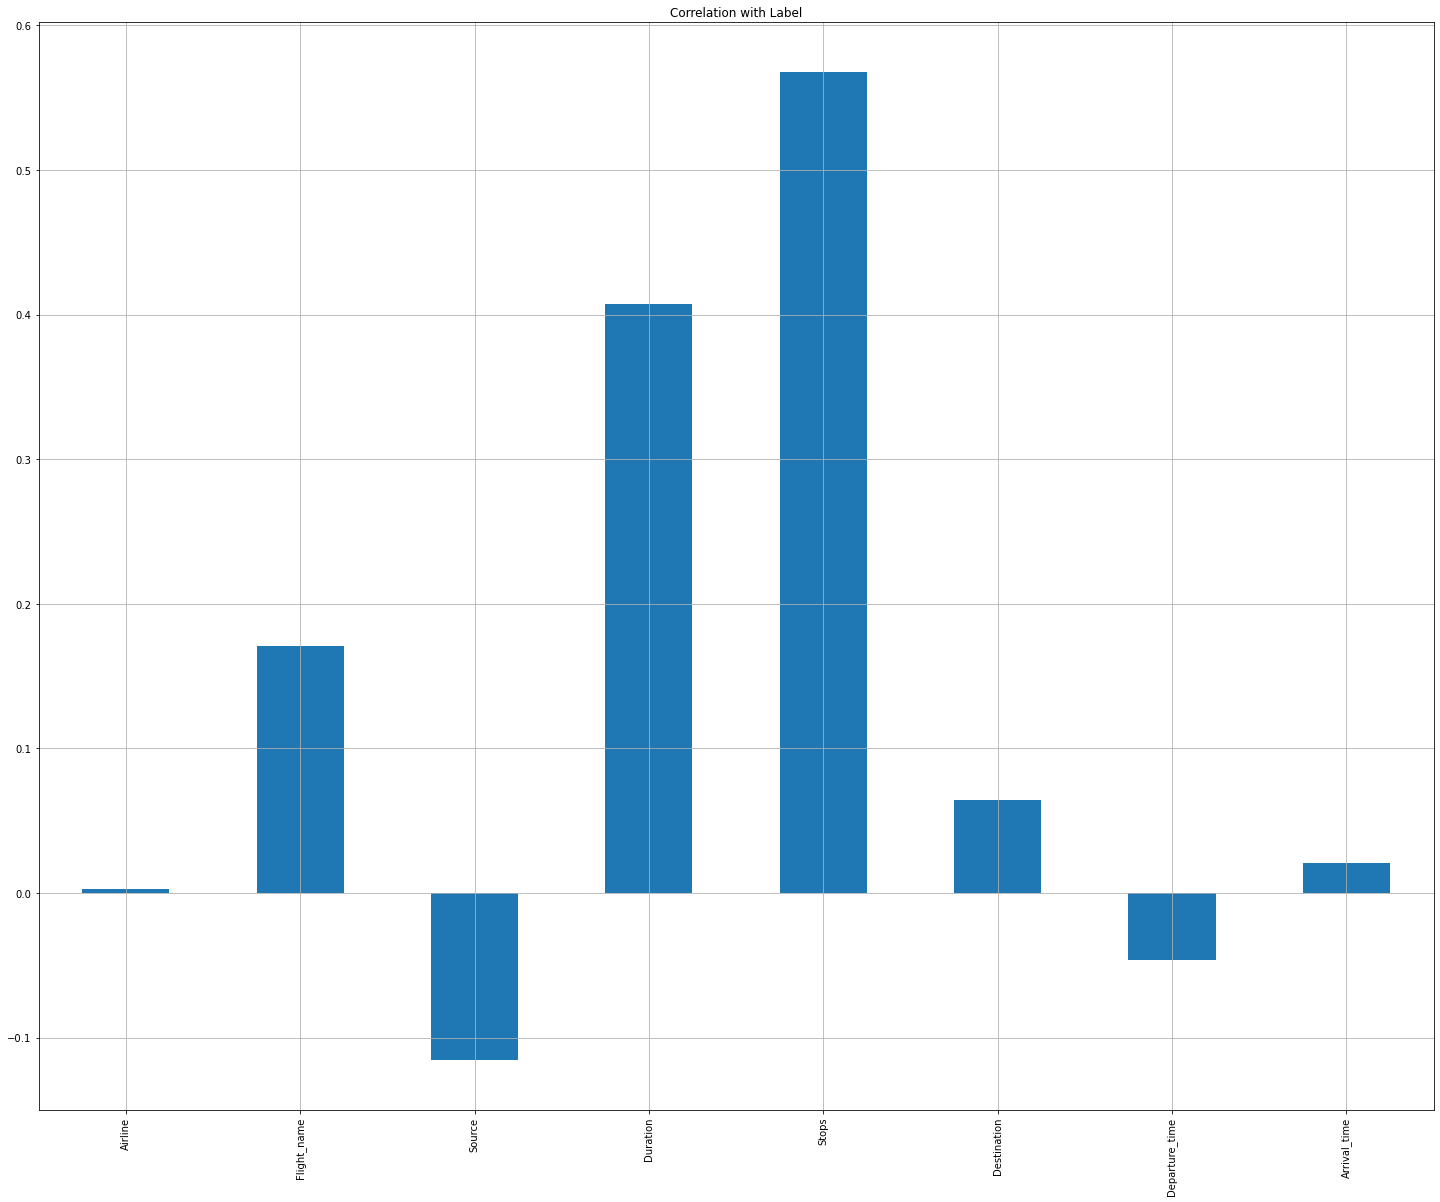

In [89]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(25,20),
                                                     title="Correlation with Label")
plt.show()

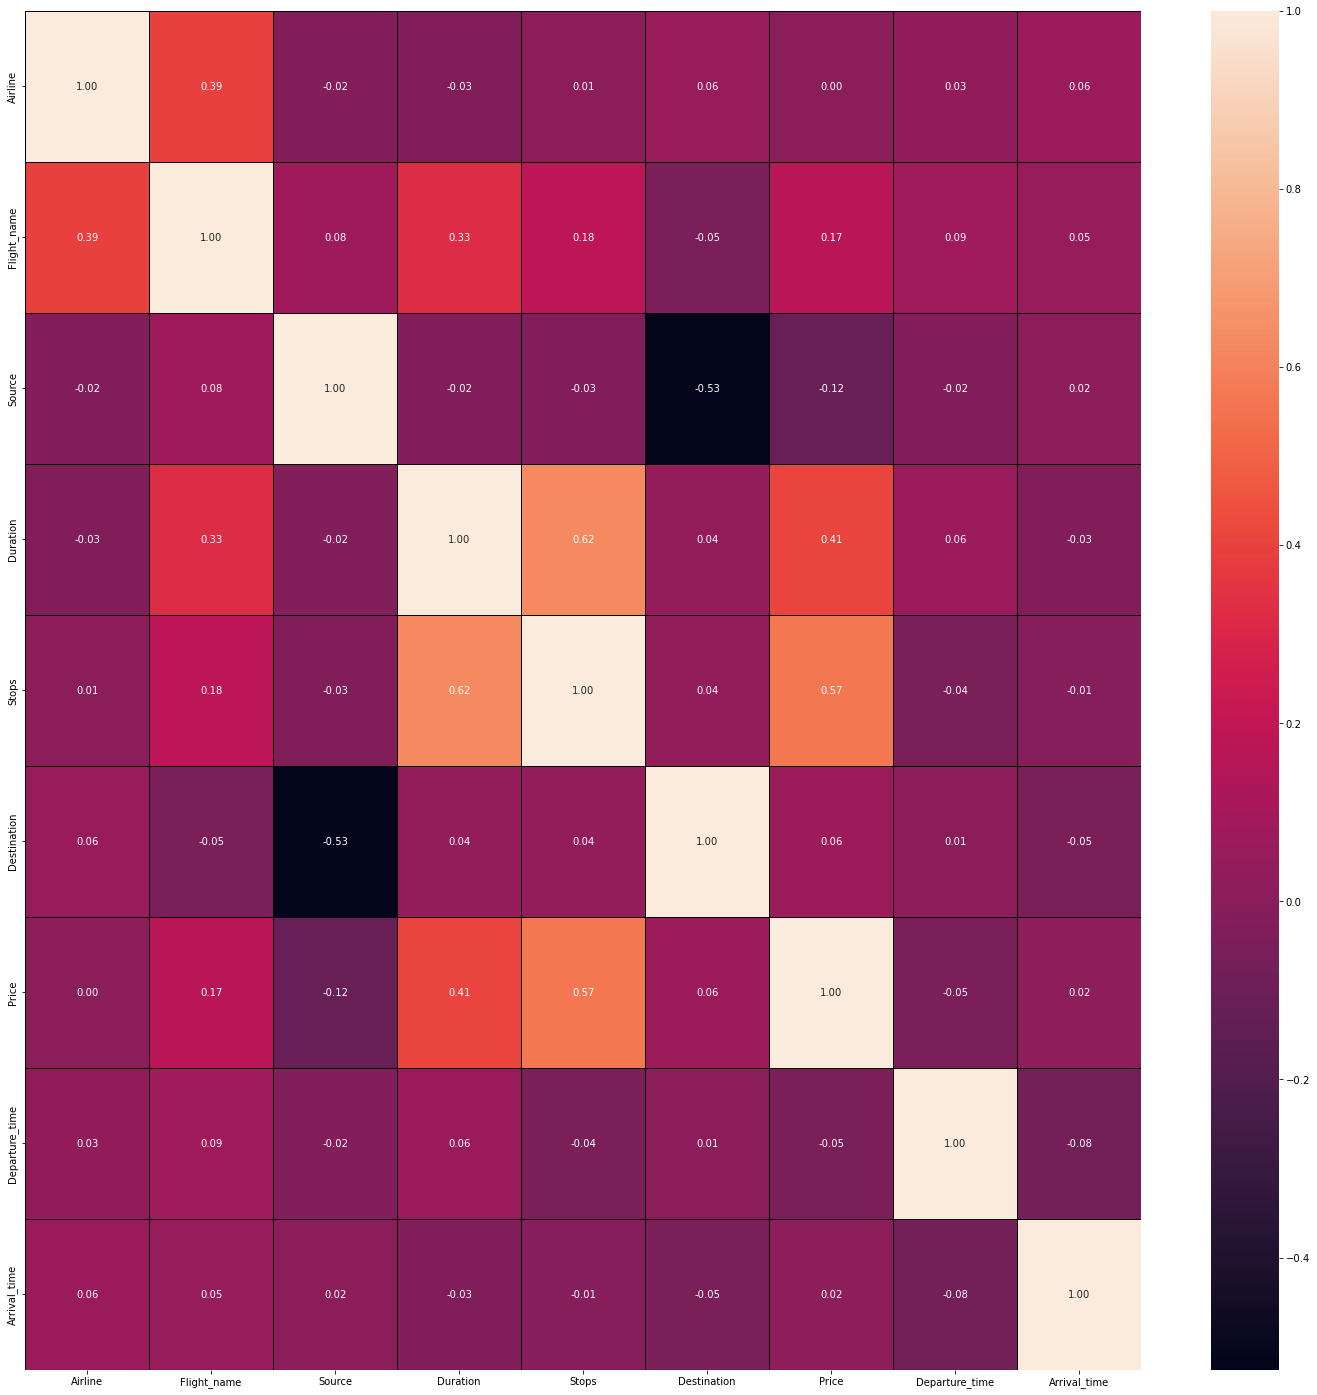

In [90]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem does not exist in this database

In [91]:
x = df.drop('Price',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
1,Flight_name,6.822581
4,Stops,6.013416
3,Duration,5.434747
6,Departure_time,4.856834
7,Arrival_time,4.294432
0,Airline,3.908851
5,Destination,2.695734
2,Source,1.962432


VIF is below 10 hence not making any changes

In [92]:
df

,Airline,Flight_name,Source,Duration,Stops,Destination,Price,Departure_time,Arrival_time
0,4.0,333.0,0.0,2.00,0,4.0,5950,13.20,15.20
1,4.0,336.0,0.0,2.10,0,4.0,5950,7.00,9.10
2,4.0,337.0,0.0,2.10,0,4.0,5950,14.30,16.40
3,6.0,452.0,0.0,2.15,0,4.0,5950,7.20,9.35
4,4.0,330.0,0.0,2.15,0,4.0,5950,18.20,20.35
...,...,...,...,...,...,...,...,...,...
1508,0.0,249.0,2.0,10.15,2,0.0,18543,6.00,16.15
1509,0.0,249.0,2.0,14.15,2,0.0,19593,6.00,20.15
1510,0.0,249.0,2.0,12.20,2,0.0,20118,6.00,18.20
1511,0.0,250.0,2.0,13.00,2,0.0,20223,11.05,0.05


In [93]:
x = df.drop('Price',axis=1)
y = df['Price']

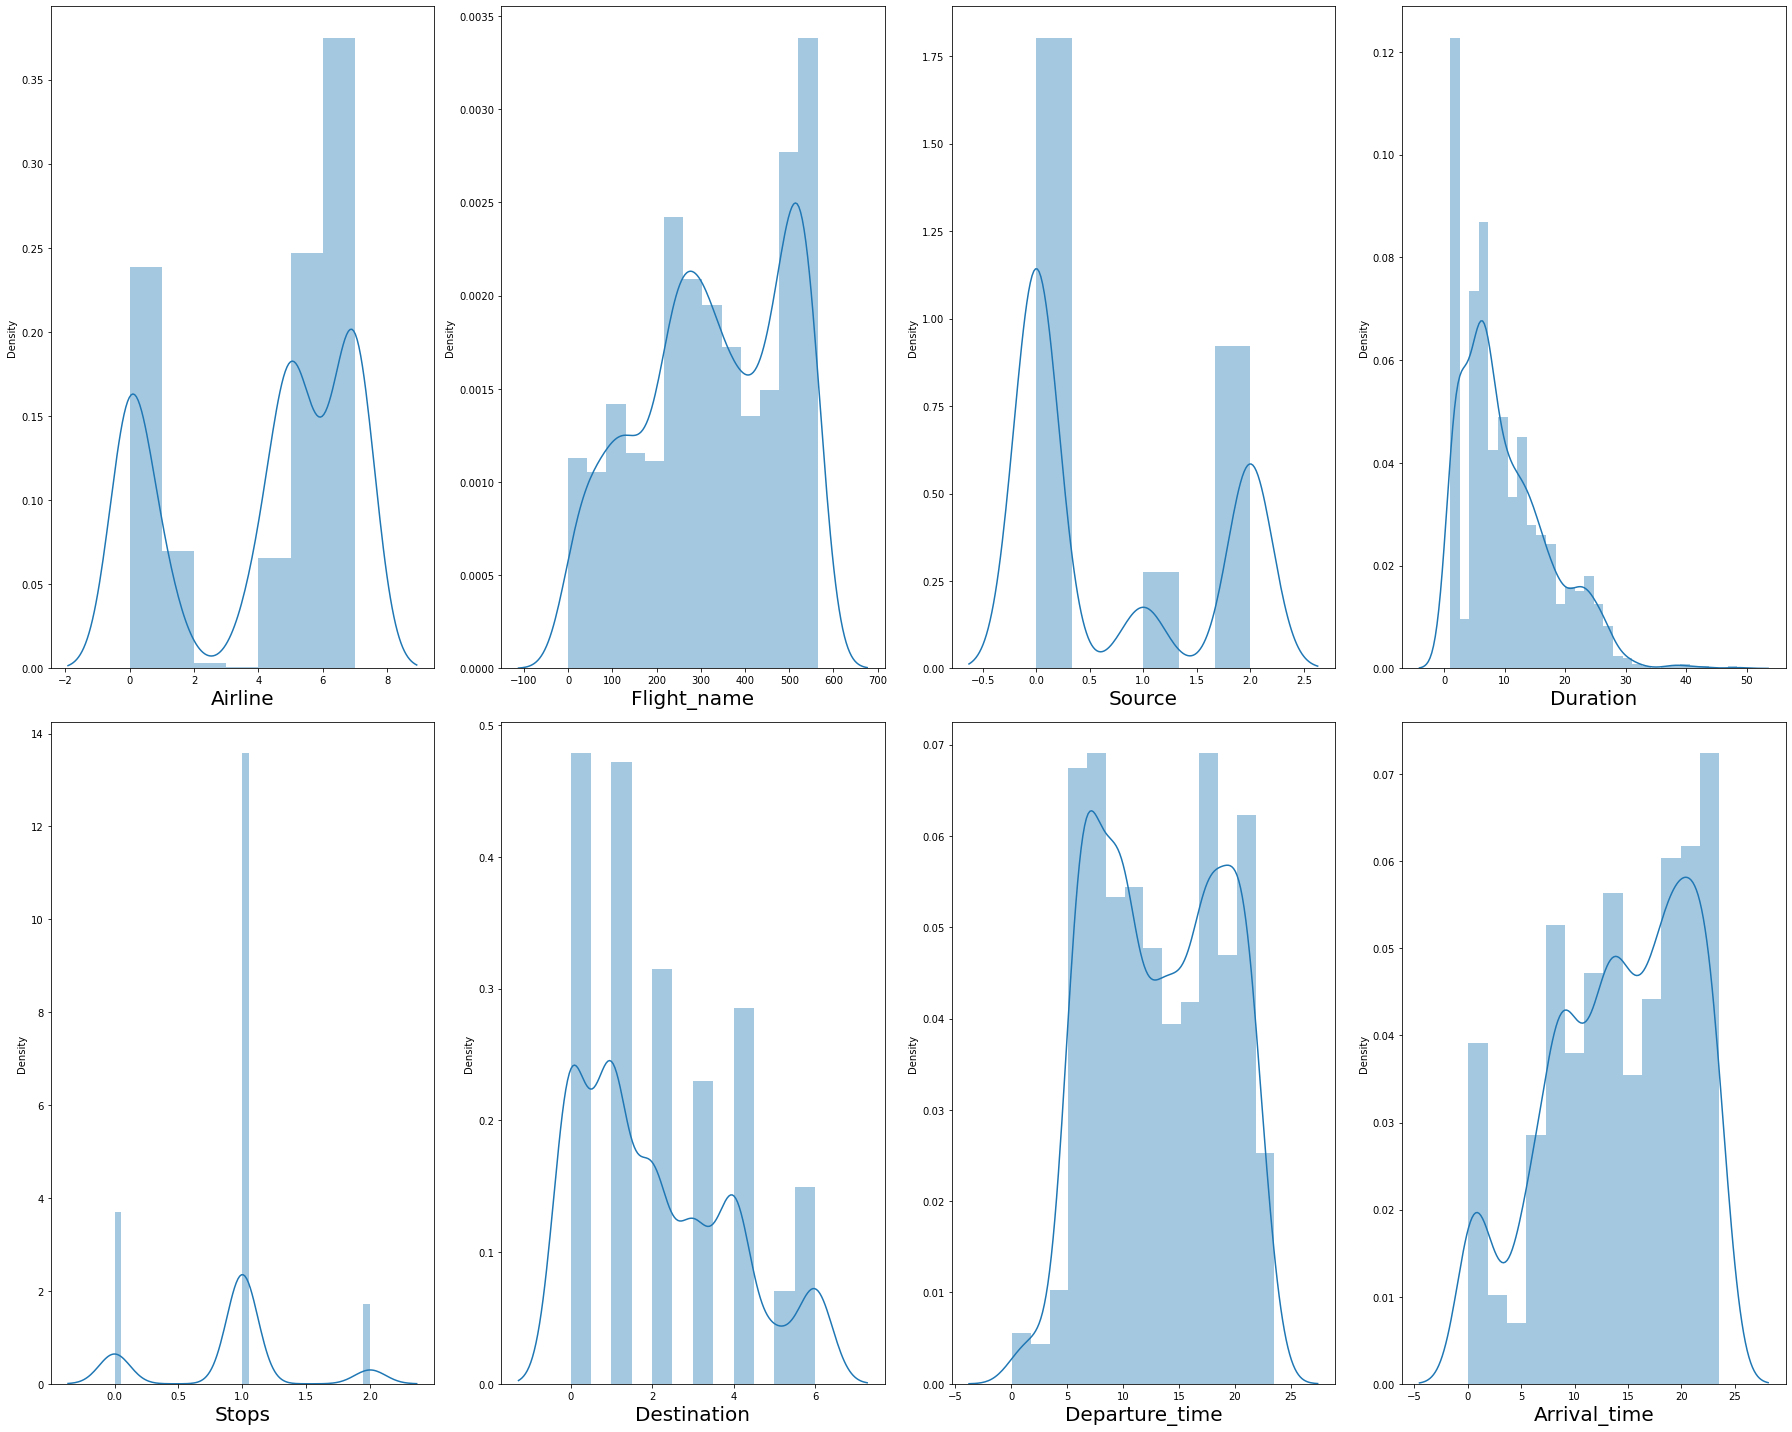

In [94]:
plt.figure(figsize=(25,20), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [95]:
for i in df.columns:
    a = df[i].skew()
    print(i,'=',a)

Airline = -0.5232826551794233
Flight_name = -0.2550587641592413
Source = 0.6117756932690838
Duration = 1.036958821433457
Stops = -0.12001908691252536
Destination = 0.6311577389251464
Price = 0.7731787028100621
Departure_time = -0.003751357915198516
Arrival_time = -0.44908075148929044


Not considering skewness of categorical data columns
- Duration column has skewness

In [96]:
df.describe()

,Airline,Flight_name,Source,Duration,Stops,Destination,Price,Departure_time,Arrival_time
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,4.118969,326.550562,0.706543,10.151058,0.895572,2.089888,12722.491738,13.250859,14.079775
std,2.769422,161.746361,0.906949,7.316011,0.524215,1.839415,4901.620050,5.595961,6.572450
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4204.000000,0.100000,0.050000
25%,1.000000,214.000000,0.000000,5.100000,1.000000,1.000000,9039.000000,8.250000,9.100000
50%,5.000000,325.000000,0.000000,8.150000,1.000000,2.000000,12150.000000,13.200000,14.450000
75%,7.000000,483.000000,2.000000,14.300000,1.000000,4.000000,16044.000000,18.200000,19.550000
max,7.000000,564.000000,2.000000,48.500000,2.000000,6.000000,41859.000000,23.550000,23.550000


Database is ready to remove outliers if exist 

In [97]:
x = df.drop(['Price'],axis=1)
y = df['Price']

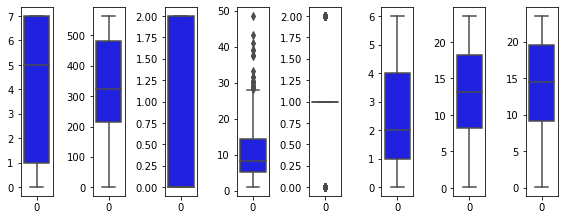

In [98]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Kilometers_Driven, Mileage, Max_power and Fuel_tank_capacity Column has outliers.

In [99]:
df.columns

Index(['Airline', 'Flight_name', 'Source', 'Duration', 'Stops', 'Destination',
       'Price', 'Departure_time', 'Arrival_time'],
      dtype='object')

In [100]:
old_data = (df.shape)[0]

In [101]:
q1 = df['Duration'].quantile(0.25)
q3 = df['Duration'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Duration'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Duration'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Duration column

In [102]:
new_data = (df.shape)[0]

In [103]:
data_loss = old_data - new_data
print('Data Loss -',data_loss)

Data Loss - 20


Data Loss is very less

In [104]:
x = df.drop(['Price'],axis=1)
y = df['Price']

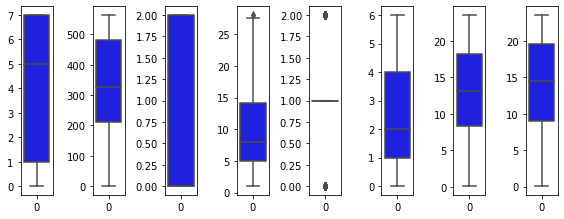

In [105]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Cleared all the outliers

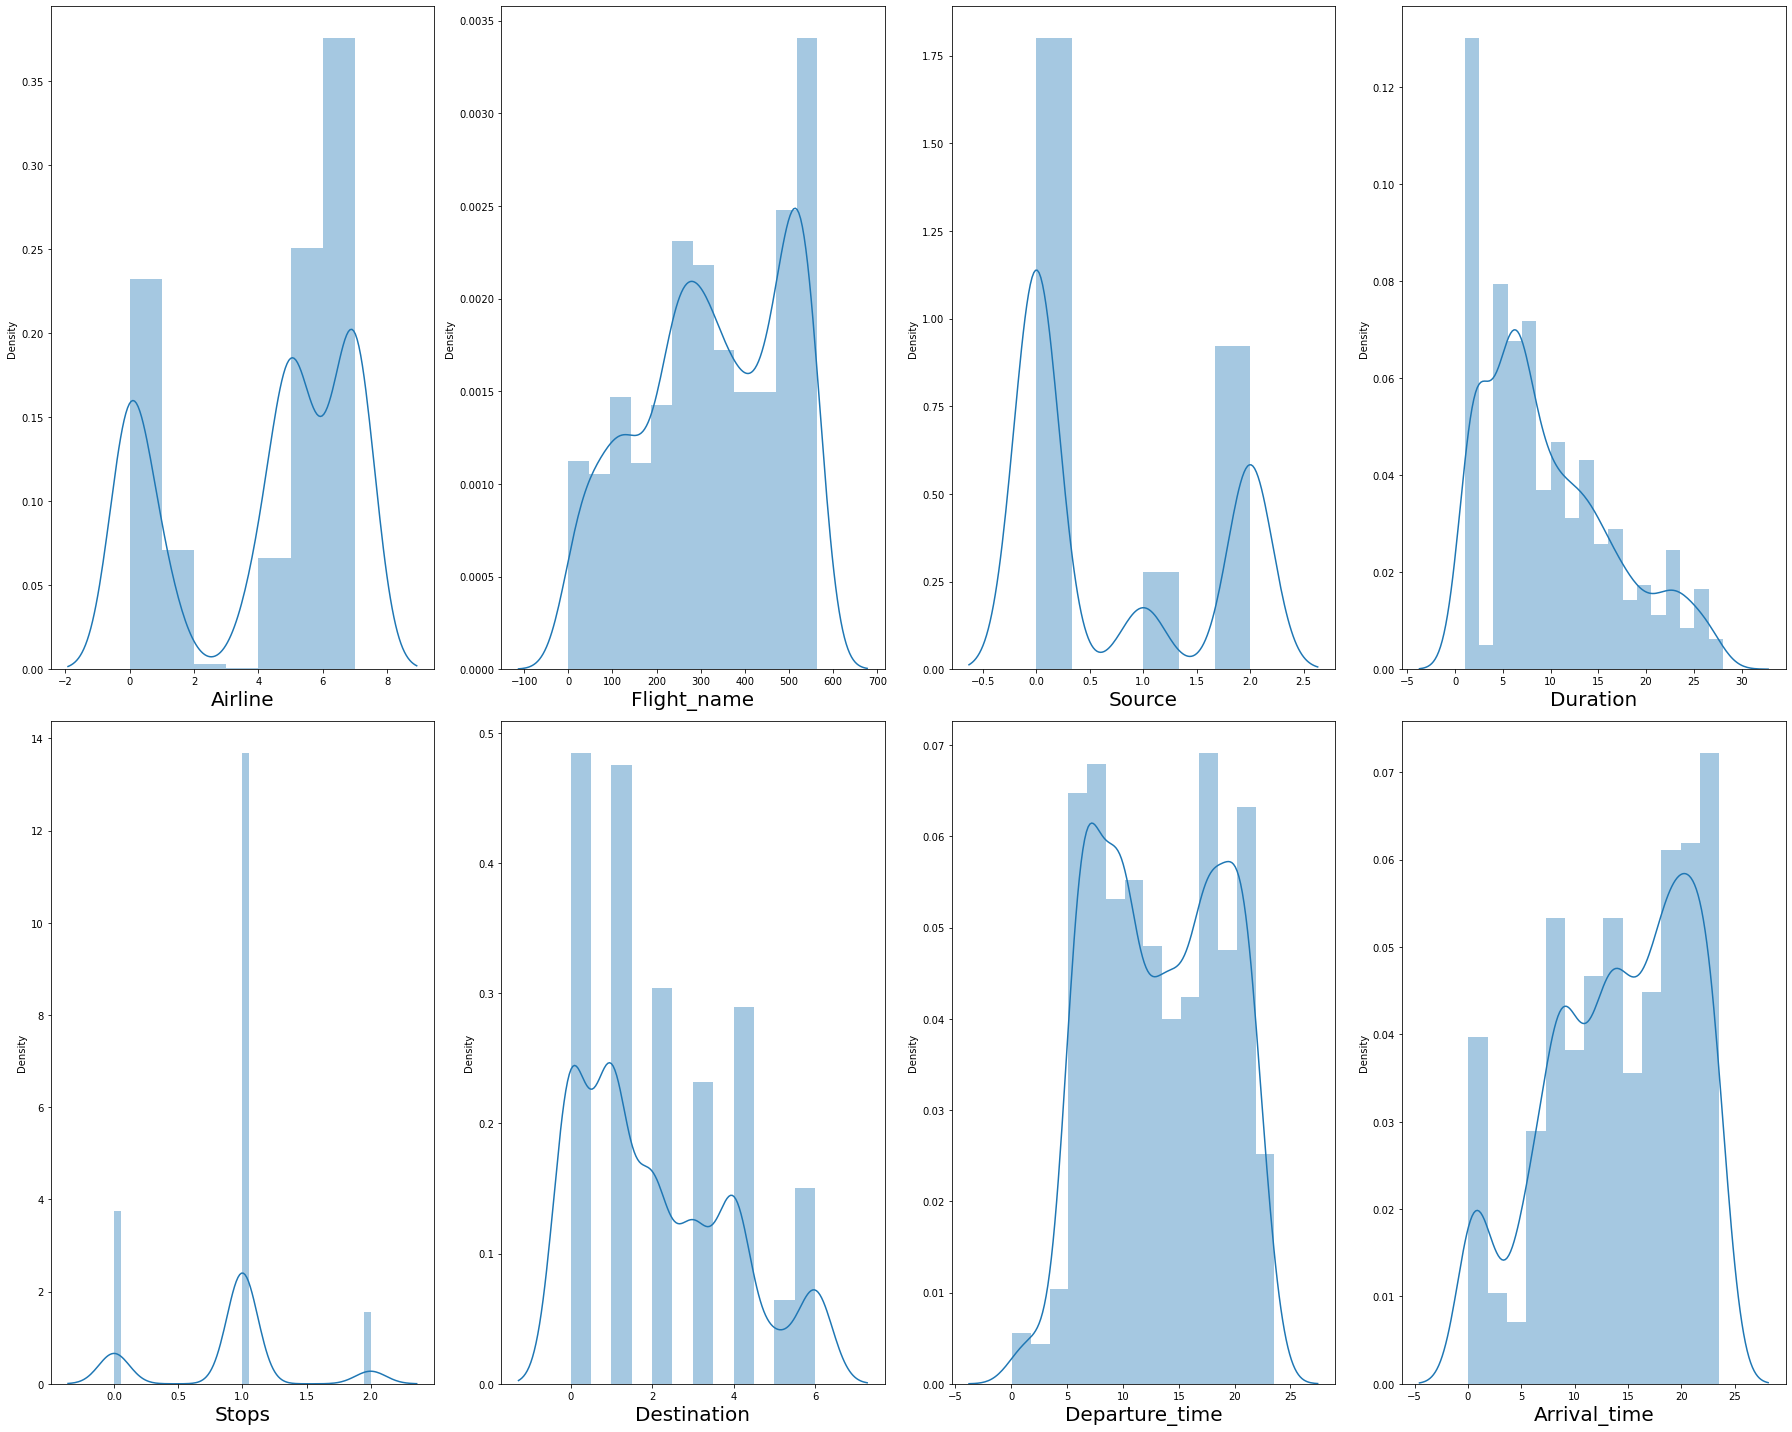

In [106]:
plt.figure(figsize=(25,20), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Duration column has skewness in the data

In [107]:
for i in df.columns:
    a = df[i].skew()
    print(i,'=',a)

Airline = -0.5424921820477729
Flight_name = -0.2603299134976882
Source = 0.6100224541935255
Duration = 0.7783335065994123
Stops = -0.15985800374631431
Destination = 0.6365968822013495
Price = 0.7580996786099135
Departure_time = -0.019980863770844477
Arrival_time = -0.4467826715924132


In [109]:
scaler = PowerTransformer(method='yeo-johnson')
df[['Duration']] = scaler.fit_transform(df[['Duration']].values)

Removed skewness from Duration column

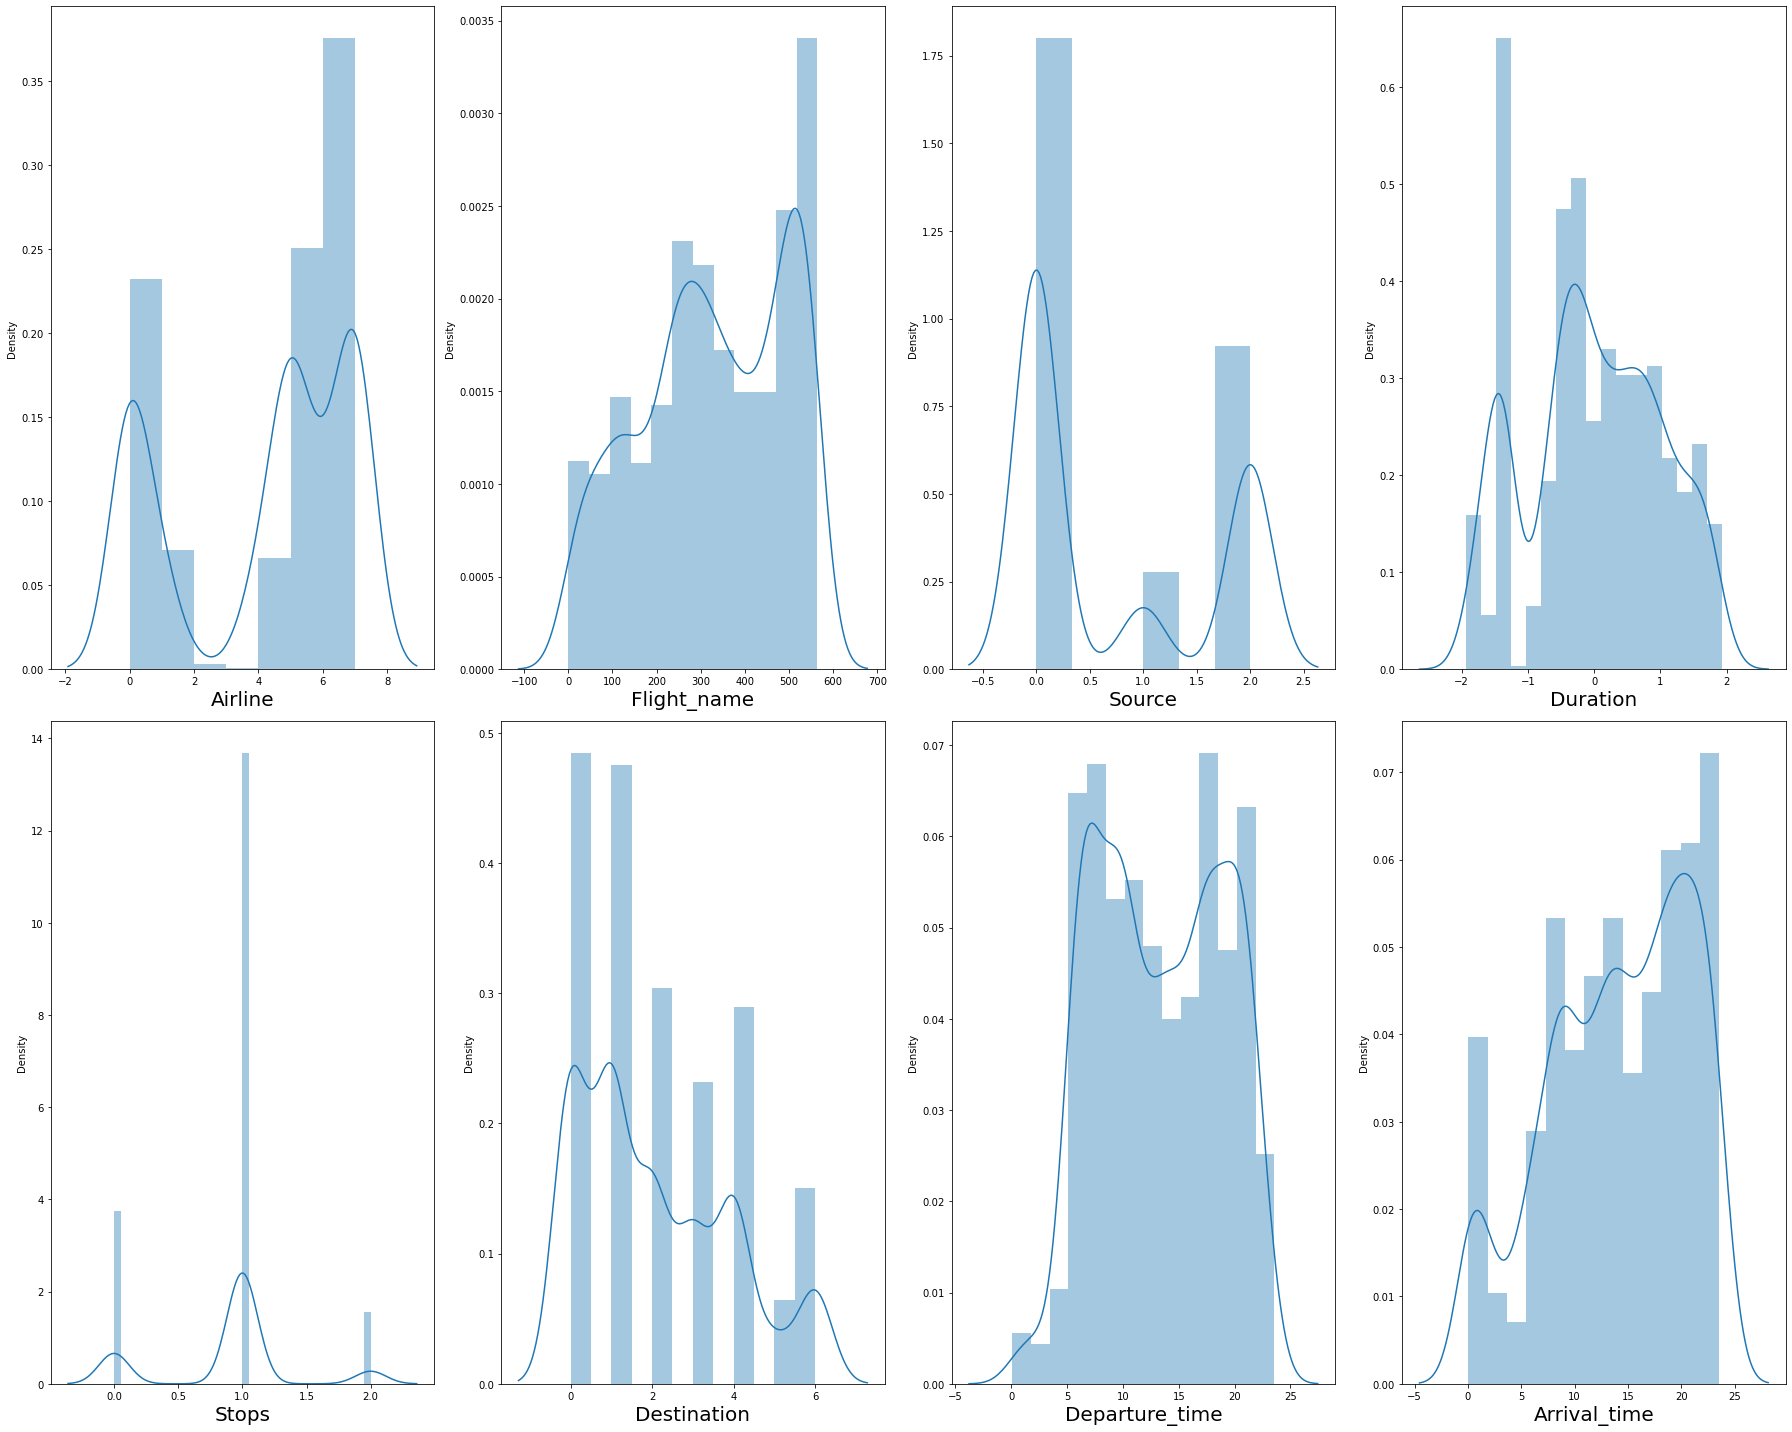

In [110]:
x = df.drop(['Price'],axis=1)
y = df['Price']

plt.figure(figsize=(25,20), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [111]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [112]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# LinearRegression

In [113]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.33952523923296307
At Random state 0 the testing accuracy is :- 0.3822621553771848


At Random state 1 the training accuracy is :- 0.35520036868264426
At Random state 1 the testing accuracy is :- 0.3416484632672706


At Random state 2 the training accuracy is :- 0.3641131101912136
At Random state 2 the testing accuracy is :- 0.3147940434834916


At Random state 3 the training accuracy is :- 0.37578848022655975
At Random state 3 the testing accuracy is :- 0.28461021041651324


At Random state 4 the training accuracy is :- 0.3503392375598742
At Random state 4 the testing accuracy is :- 0.3548827414966812


At Random state 5 the training accuracy is :- 0.3592699261596922
At Random state 5 the testing accuracy is :- 0.32990793100532756


At Random state 6 the training accuracy is :- 0.3342681045561563
At Random state 6 the testing accuracy is :- 0.40081181330018123


At Random state 7 the training accuracy is :- 0.34575451880662245
At Random s

In [114]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 57)

In [115]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [116]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 35.12%

===============Test Result===============
Accuracy Score: 35.14%

 mean_absolute_error 2909.327604800717

 mean_squared_error 13350786.497523306


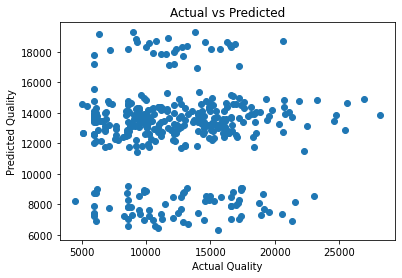

In [117]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

#### Regularization

In [118]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.35139761247292023

In [119]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.351401152428478

# Support Vector Regression

In [120]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: -0.71%

===============Test Result===============
Accuracy Score: 0.51%

 mean_absolute_error 3705.70290675736

 mean_squared_error 20479764.30287991


# DecisionTreeRegressor

In [121]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.96%

===============Test Result===============
Accuracy Score: 38.88%

 mean_absolute_error 2144.2393048128342

 mean_squared_error 12580840.179812834


# AdaBoostRegressor

In [122]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 45.08%

===============Test Result===============
Accuracy Score: 35.29%

 mean_absolute_error 2869.5860186737295

 mean_squared_error 13319825.599565027


# GradientBoostingRegressor

In [123]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 71.80%

===============Test Result===============
Accuracy Score: 62.59%

 mean_absolute_error 2045.4787969573458

 mean_squared_error 7700128.758704874


# RandomForestRegressor

In [124]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 95.06%

===============Test Result===============
Accuracy Score: 68.00%

 mean_absolute_error 1699.1851521836006

 mean_squared_error 6586032.166604344


# KNeighborsRegressor

In [125]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

print_score(knr,x_train,x_test,y_train,y_test, train=True)
print_score(knr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 66.15%

===============Test Result===============
Accuracy Score: 50.51%

 mean_absolute_error 2275.614438502674

 mean_squared_error 10186067.77657754


# Findings

- LinearRegression train accuracy score 35.12% and test accuracy score 35.14%
- Support Vector Regression train accuracy score -0.71% and test accuracy score 0.51%
- DecisionTreeRegressor train accuracy score 99.96% and test accuracy score 38.88%
- AdaBoostRegressor train accuracy score 45.08% and test accuracy score 35.29%
- GradientBoostingRegressor train accuracy score 71.80% and test accuracy score 62.59%
- RandomForestRegressor train accuracy score 95.06% and test accuracy score 68.00%
- KNeighborsRegressor train accuracy score 66.15% and test accuracy score 50.51%




# Conclusion 

##### Selecting LinearRegression since the Accuracy score and test scores are greater and close to each other.

### Saving the Model 

In [ ]:
file = 'Flight_Ticket_Price.pickle'
pickle.dump(reg, open(file, 'wb'))